In [1]:
pwd

'C:\\Users\\Vaishnavai\\parkinson files'

In [2]:
import pandas as pd
park_data=pd.read_csv("C:\\Users\\parkinson files\\parkson dataset.csv")

In [3]:
park_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [4]:
park_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
park_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
park_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [8]:
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
parkinson_data = pd.read_csv("C:\\Users\\Vaishnavai\\parkinson files\\parkson dataset.csv")
print("data read successfully")

data read successfully


In [11]:
n_patients = parkinson_data.shape[0]   ##number of patients
n_features = parkinson_data.shape[1]-1 ##number of features
n_parkinsons = parkinson_data[parkinson_data['status'] == 1].shape[0] ##persons with parkinson 
n_healthy = parkinson_data[parkinson_data['status'] == 0].shape[0] ##healthy persons
print ("total number of patients:", n_patients)
print ("number of features:", n_features)
print ("number of patients with parkinson:", n_parkinsons)
print ("number of patients without parkinsons:", n_healthy)

total number of patients: 195
number of features: 23
number of patients with parkinson: 147
number of patients without parkinsons: 48


In [12]:
dataset=pd.read_csv("C:\\Users\\Vaishnavai\\parkinson files\\parkson dataset.csv")
X= dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23]].values
y= dataset.iloc[:,17].values
#splitdataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5, random_state=0)

In [13]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
#appling principal compound analysis (PCA) feature extraction
from sklearn.decomposition import PCA
pca= PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance= pca.explained_variance_ratio_

# KNN model

In [15]:
#fitting into knn model
from sklearn.neighbors import KNeighborsClassifier
classifi= KNeighborsClassifier(n_neighbors =2, p=1, metric ='minkowski')
classifi.fit(X_train,y_train)
#predicting results
y1_pred = classifi.predict(X_test)


In [16]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y1_pred)
print("accuracy of knn model is:",accuracy_score(y_test,y1_pred)*100)
error_rate = 1- accuracy_score(y_test,y1_pred)
print(" error rate",error_rate*100)

accuracy of knn model is: 86.73469387755102
 error rate 13.265306122448983


In [16]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.76        24
           1       0.96      0.86      0.91        74

    accuracy                           0.87        98
   macro avg       0.82      0.87      0.84        98
weighted avg       0.89      0.87      0.87        98



In [17]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, y1_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 21
FP - False Positive 3
FN - False Negative 10
TP - True Positive 64
Accuracy Rate: 0.8673469387755102
Misclassification Rate: 0.1326530612244898


# SVM

In [18]:
#fitting into svm model
from sklearn.svm import SVC
classifi2 = SVC()
classifi2.fit(X_train,y_train)
#results
y2_pred = classifi2.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y2_pred)
print("accuracy of svm model is:",accuracy_score(y_test,y2_pred)*100)
error_rate = 1- accuracy_score(y_test,y2_pred)
print(" error rate",error_rate*100)

accuracy of svm model is: 86.73469387755102
 error rate 13.265306122448983


In [19]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.50      0.65        24
           1       0.86      0.99      0.92        74

    accuracy                           0.87        98
   macro avg       0.89      0.74      0.78        98
weighted avg       0.87      0.87      0.85        98



In [20]:
# Print out confusion matrix
cm =np.array(confusion_matrix(y_test, y2_pred))
confusion= pd.DataFrame(cm,index=['is_parkinson','is_healthy'], columns=['predicted_parkinson','predicted_healthy'])
#print(cmat)
confusion

,predicted_parkinson,predicted_healthy
is_parkinson,12,12
is_healthy,1,73


In [21]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, y2_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 12
FP - False Positive 12
FN - False Negative 1
TP - True Positive 73
Accuracy Rate: 0.8673469387755102
Misclassification Rate: 0.1326530612244898


# Randomforest

In [22]:
#fitting into random forest model
from sklearn.ensemble import RandomForestClassifier
classifi3=RandomForestClassifier(n_estimators =10, criterion= "entropy" , random_state = 0)
classifi3.fit(X_train,y_train)
#results
y3_pred = classifi3.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y3_pred)
cm= confusion_matrix(y_test,y3_pred)
print("accuracy of random forest model is:",accuracy_score(y_test,y3_pred)*100)
error_rate = 1- accuracy_score(y_test,y3_pred)
print(" error rate",error_rate*100)

accuracy of random forest model is: 91.83673469387756
 error rate 8.163265306122447


In [23]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y3_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.97      0.92      0.94        74

    accuracy                           0.92        98
   macro avg       0.88      0.92      0.90        98
weighted avg       0.93      0.92      0.92        98



In [24]:
# Print out confusion matrix
cm =np.array(confusion_matrix(y_test, y3_pred))
confusion= pd.DataFrame(cm,index=['is_parkinson','is_healthy'], columns=['predicted_parkinson','predicted_healthy'])
#print(cmat)
confusion

,predicted_parkinson,predicted_healthy
is_parkinson,22,2
is_healthy,6,68


# NaviBayes

In [25]:
from sklearn.naive_bayes import GaussianNB
classifi4=GaussianNB()
classifi4.fit(X_train,y_train)
#results
y4_pred = classifi4.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y4_pred)
print("accuracy of naiveBayes model is:",accuracy_score(y_test,y4_pred)*100)
error_rate = 1- accuracy_score(y_test,y4_pred)
print(" error rate",error_rate*100)

accuracy of naiveBayes model is: 78.57142857142857
 error rate 21.42857142857143


In [26]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y4_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55        24
           1       0.85      0.86      0.86        74

    accuracy                           0.79        98
   macro avg       0.71      0.70      0.71        98
weighted avg       0.78      0.79      0.78        98



In [27]:
# Print out confusion matrix
cm =np.array(confusion_matrix(y_test, y4_pred))
confusion= pd.DataFrame(cm,index=['is_parkinson','is_healthy'], columns=['predicted_parkinson','predicted_healthy'])
#print(cmat)
confusion

,predicted_parkinson,predicted_healthy
is_parkinson,13,11
is_healthy,10,64


# Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifi5=DecisionTreeClassifier()
classifi5.fit(X_train,y_train)
#results
y5_pred = classifi5.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y5_pred)
print("accuracy of decisiontree model is:",accuracy_score(y_test,y5_pred)*100)
error_rate = 1- accuracy_score(y_test,y5_pred)
print(" error rate",error_rate*100)

accuracy of decisiontree model is: 90.81632653061224
 error rate 9.183673469387754


In [29]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y5_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.96      0.92      0.94        74

    accuracy                           0.91        98
   macro avg       0.87      0.90      0.88        98
weighted avg       0.91      0.91      0.91        98



In [30]:
# Print out confusion matrix
cm =np.array(confusion_matrix(y_test, y5_pred))
confusion= pd.DataFrame(cm,index=['is_parkinson','is_healthy'], columns=['predicted_parkinson','predicted_healthy'])
#print(cmat)
confusion

,predicted_parkinson,predicted_healthy
is_parkinson,21,3
is_healthy,6,68


# linear model

In [31]:
from sklearn.linear_model import LinearRegression
classifi6=LinearRegression()
classifi6.fit(X_train,y_train)
#results
y6_pred = classifi6.predict(X_test)
accuracy = classifi6.score(X_test,y_test)
print(accuracy*100,'%')

33.25477464523654 %


In [32]:
cm =np.array(confusion_matrix(y_test, y5_pred))
confusion= pd.DataFrame(cm,index=['is_parkinson','is_healthy'], columns=['predicted_parkinson','predicted_healthy'])
#print(cmat)
confusion

,predicted_parkinson,predicted_healthy
is_parkinson,21,3
is_healthy,6,68


In [33]:
from pandas.plotting import scatter_matrix
import pylab

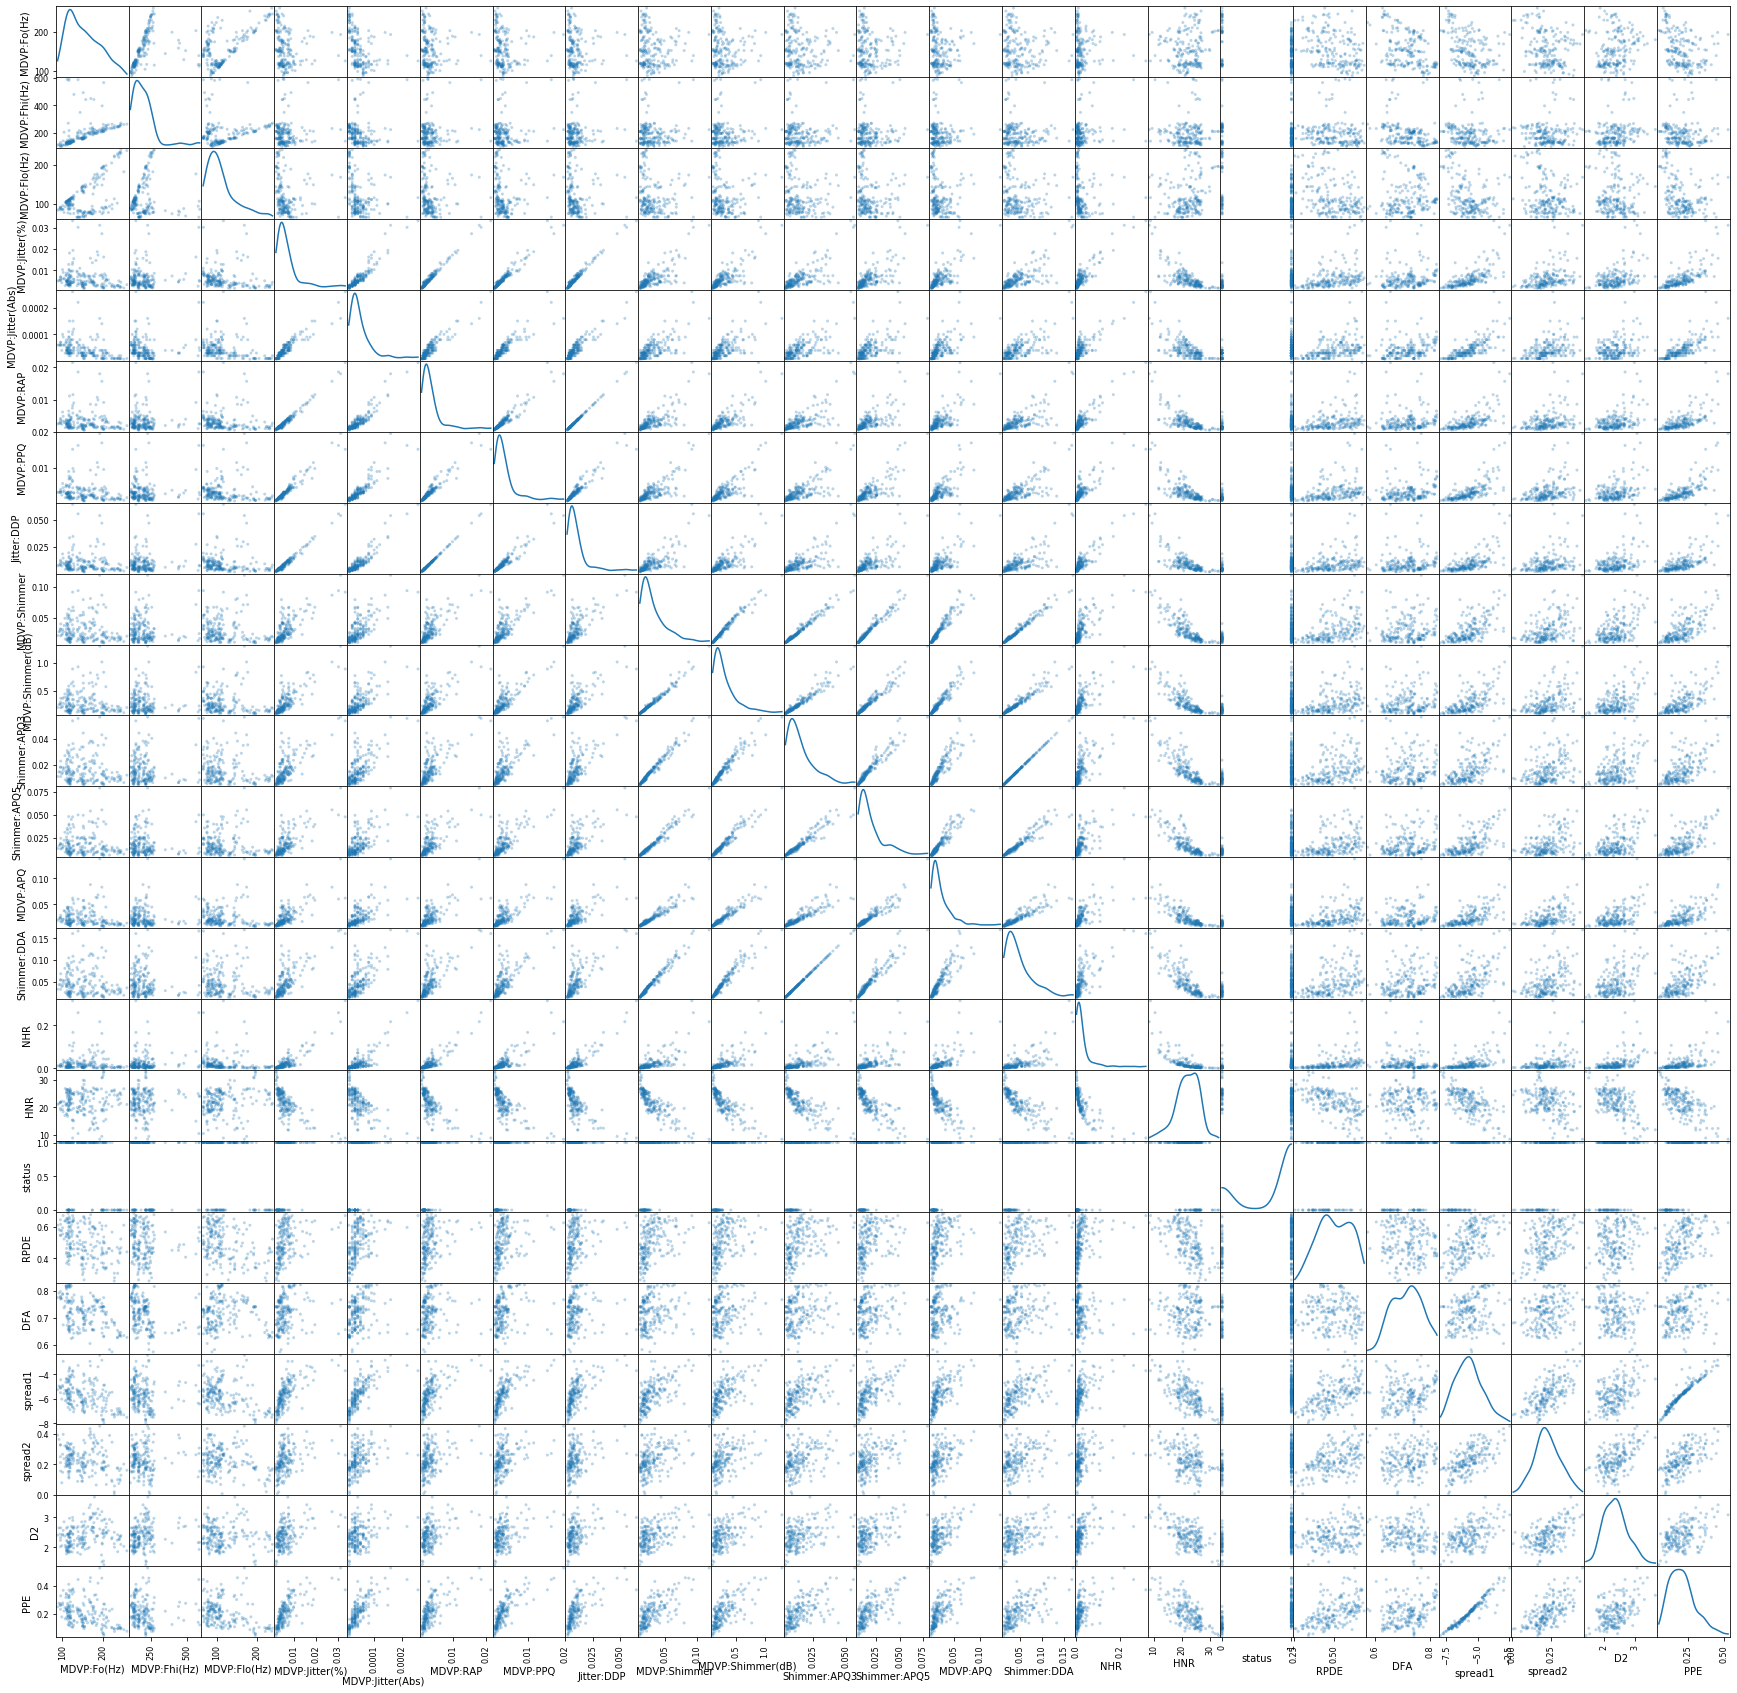

In [34]:
##plot and save the scatter plot of features
pd.plotting.scatter_matrix(parkinson_data, alpha = 0.3, figsize = (30,30), diagonal = 'kde')
pylab.savefig("scatter" + ".png")

In [35]:
n_patients = parkinson_data.shape[0]   ##number of patients
n_features = parkinson_data.shape[1]-1 ##number of features
n_parkinsons = parkinson_data[parkinson_data['status'] == 1].shape[0] ##persons with parkinson 
n_healthy = parkinson_data[parkinson_data['status'] == 0].shape[0] ##healthy persons
print ("total number of patients:", n_patients)
print ("number of features:", n_features)
print ("number of patients with parkinson:", n_parkinsons)
print ("number of patients without parkinsons:", n_healthy)

total number of patients: 195
number of features: 23
number of patients with parkinson: 147
number of patients without parkinsons: 48
